In [ ]:
from tensorflow import keras
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Creamos la red neuronal que es el autencoder.

In [ ]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

In [ ]:
autoencoder.compile(loss='mse', optimizer = keras.optimizers.SGD(learning_rate=0.1))

Creamos los datos para realizar la reducción de dimensionalidad.

In [ ]:
X, y = make_classification(n_samples=100, n_features=3, n_informative=2, n_redundant=1)

In [ ]:
history = autoencoder.fit(X, X, epochs = 20)

Epoch 1/20
4/4 [==============================] - 1s 6ms/step - loss: 0.8114
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 0.6087
Epoch 3/20
4/4 [==============================] - 0s 6ms/step - loss: 0.5346
Epoch 4/20
4/4 [==============================] - 0s 5ms/step - loss: 0.4552
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3651
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2437
Epoch 7/20
4/4 [==============================] - 0s 8ms/step - loss: 0.1348
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 0.0606
Epoch 9/20
4/4 [==============================] - 0s 4ms/step - loss: 0.0254
Epoch 10/20
4/4 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 11/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 12/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 13/20
4/4 [==============================] - 0s 2ms/step - loss: 0.

In [ ]:
codings = encoder.predict(X)

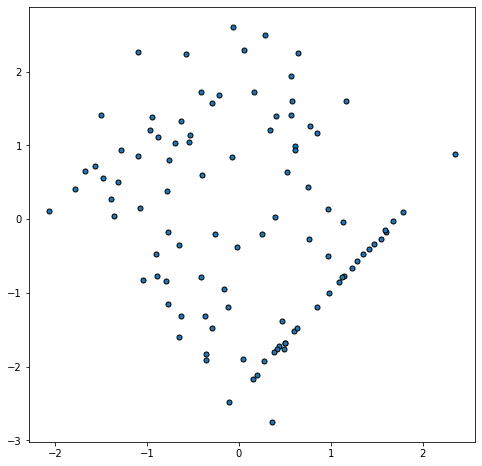

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(codings[:, 0], codings[:, 1], marker="o", s=25, edgecolor="k")

Ahora, hacemos PCA.

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

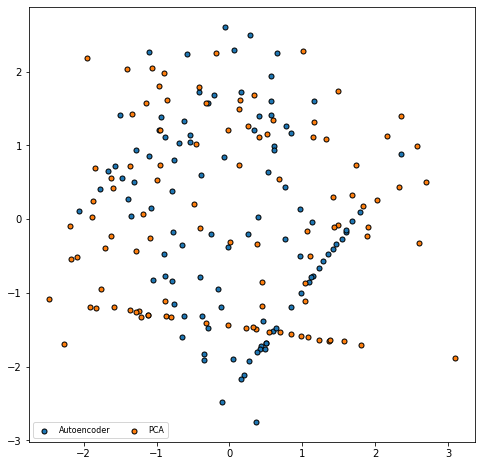

In [ ]:
plt.figure(figsize=(8, 8))
ae_plt = plt.scatter(codings[:, 0], codings[:, 1], marker="o", s=25, edgecolor="k")
pca_plt = plt.scatter(X[:, 0], X[:, 1], marker="o", s=25, edgecolor="k")
plt.legend((ae_plt, pca_plt),
           ('Autoencoder', 'PCA'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)